# <center> ANALYSIS on COVID-19 Data </center>

## Purpose of Analysis
In this project, I will focus on the exploration side of the analysis to examine the spread of corona virus in the world. My exploration will be divided into three parts:

#### Part 1 - Explore the Countries of the World
I am interested in the following:
- The total number of cases per country
- The total number of deaths per country
- The total number of cases per country divided by the number of population, which I will call **case ratio** 
- The total number of deaths per country divided by the total number of cases for that country, which I will call **death ratio**

For explanatory purpose, I will plot the world map for each variable above to see how the values vary among the countries. I will also plot a bar chart for the affected top ten countries. 

I am also interested to see the progress of the daily cases and deaths over time, so I will create a line chart to achieve that.

#### Part 2 - Find the Relationship between the Number of Total Cases and Population Density
In this part, I would like to answer a question whether a relationship exists between the population density and the number of total cases. My initial assumption is that as the population density increases, the total number of cases increases due to higher probability of infection.


#### Part 3 - Explore the Arab world
Here, I will create bar charts as in step 1 but only for Arab world countries. I will also look at the progress of cases and deaths for each country using `sns.FacetGrid`. Finally, I will create a line chart of daily cases for the top five Arab world countries with highest total cases.


In [104]:
# import necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
plt.style.use('seaborn-whitegrid')

In [105]:
# read files
df = pd.read_csv('covid_19_clean.csv', parse_dates=['date'])
df_map = gpd.read_file('world_map.shp')

## Exploratory Data Analysis
### `df`

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33204 entries, 0 to 33203
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        33204 non-null  datetime64[ns]
 1   cases       33204 non-null  int64         
 2   deaths      33204 non-null  int64         
 3   country     33204 non-null  object        
 4   iso_2       33065 non-null  object        
 5   iso_3       33204 non-null  object        
 6   population  33204 non-null  int64         
 7   continent   33204 non-null  object        
 8   density     33204 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.3+ MB


In [102]:
# check the head of df after cleaning
df.head()

,date,cases,deaths,country,iso_2,iso_3,population,continent,density
0,2020-07-31,71,0,Afghanistan,AF,AFG,38041757,Asia,60.00
1,2020-07-30,0,0,Afghanistan,AF,AFG,38041757,Asia,60.00
2,2020-07-29,103,1,Afghanistan,AF,AFG,38041757,Asia,60.00
3,2020-07-28,105,1,Afghanistan,AF,AFG,38041757,Asia,60.00
4,2020-07-27,106,10,Afghanistan,AF,AFG,38041757,Asia,60.00


In [6]:
# check the tail of df after cleaning
df.tail()

,date,cases,deaths,country,iso_2,iso_3,population,continent,density
33199,2020-03-25,0,0,Zimbabwe,ZW,ZWE,14645473,Africa,38.00
33200,2020-03-24,0,1,Zimbabwe,ZW,ZWE,14645473,Africa,38.00
33201,2020-03-23,0,0,Zimbabwe,ZW,ZWE,14645473,Africa,38.00
33202,2020-03-22,1,0,Zimbabwe,ZW,ZWE,14645473,Africa,38.00
33203,2020-03-21,1,0,Zimbabwe,ZW,ZWE,14645473,Africa,38.00


In [7]:
# take one country, ex: "Afhanistan" and see how the data is organized
print(df[df['country']=='Afghanistan'].head())
print(df[df['country']=='Afghanistan'].tail())

        date  cases  deaths      country iso_2 iso_3  population continent  \
0 2020-07-31     71       0  Afghanistan    AF   AFG    38041757      Asia   
1 2020-07-30      0       0  Afghanistan    AF   AFG    38041757      Asia   
2 2020-07-29    103       1  Afghanistan    AF   AFG    38041757      Asia   
3 2020-07-28    105       1  Afghanistan    AF   AFG    38041757      Asia   
4 2020-07-27    106      10  Afghanistan    AF   AFG    38041757      Asia   

   density  
0    60.00  
1    60.00  
2    60.00  
3    60.00  
4    60.00  
          date  cases  deaths      country iso_2 iso_3  population continent  \
199 2020-01-04      0       0  Afghanistan    AF   AFG    38041757      Asia   
200 2020-01-03      0       0  Afghanistan    AF   AFG    38041757      Asia   
201 2020-01-02      0       0  Afghanistan    AF   AFG    38041757      Asia   
202 2020-01-01      0       0  Afghanistan    AF   AFG    38041757      Asia   
203 2019-12-31      0       0  Afghanistan    AF   AF

In [8]:
# find the start and end date where the data were collected
df.date.min(), df.date.max()

(Timestamp('2019-12-31 00:00:00'), Timestamp('2020-07-31 00:00:00'))

### `df_map`

In [9]:
# check the head of df_map after cleaning
df_map.head()

,continent,country,iso_3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
df_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   continent  176 non-null    object  
 1   country    176 non-null    object  
 2   iso_3      176 non-null    object  
 3   geometry   176 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 5.6+ KB


### Part 1 - Explore the Countries of the World

#### The Way Data is Organized
As we can see from the head and the tail of `df`, the data is organized alphabetically by country starting from "Afghanistan" ending with "Zimbabwe", then for each country, the data is organized by date, starting from where the first case appeared and ending by July 31, 2020, the date where I decided to stop retrieving more data. This form of the data however, is not helpful to make further analysis. Therefore, I will create new DataFrames each will be used for a specific purpose. To analyze the total of cases, deaths, case ratio, and death ratio, I will create `df_total`


In [11]:
# create df_total to get the total cases and deaths and the mean of population and desnity for each country
df_total = df.groupby(['country', 'iso_3']).agg({'cases': 'sum', 'deaths': 'sum', 'population': 'mean', 
                                                 'density': 'mean'}).reset_index()

# check the head of the new df
df_total.head()

,country,iso_3,cases,deaths,population,density
0,Afghanistan,AFG,36542,1271,38041757,60.00
1,Albania,ALB,5197,154,2862427,105.00
2,Algeria,DZA,29831,1200,43053054,18.00
3,Andorra,AND,922,52,76177,164.00
4,Angola,AGO,1078,48,31825299,26.00


In [12]:
# check the shape of df_total
df_total.shape

(209, 6)

To compare the cases and deaths among countries, it is always better to compare ratios, so to compare cases, we need to find the case ratio, i.e., number of cases divided by number of population for that country. likewise, if we want to compare the deaths among countries we need to find the number of deaths divided by the number of cases. To achieve that I will do the following steps:
1. Create a new column `case_ratio` by dividing `cases` column by `population` column
2. Create a new column  `death_ratio` by dividing `deaths` column by `cases` column

In [13]:
# create rounded case_ratio column per 10000 individuals
df_total['case_ratio'] = round(df_total['cases'] * 10000 / df_total['population'])

# create rounded death_ratio column per 100 cases
df_total['death_ratio'] = round(df_total['deaths'] * 100 / df_total['cases'])

In [14]:
# check info of df_total
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      209 non-null    object 
 1   iso_3        209 non-null    object 
 2   cases        209 non-null    int64  
 3   deaths       209 non-null    int64  
 4   population   209 non-null    int64  
 5   density      209 non-null    float64
 6   case_ratio   209 non-null    float64
 7   death_ratio  209 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 13.2+ KB


After grouping by `country` and `iso_3` and adding new columns, It is time to merge `df_total` and `df_map` by `iso_3` to create new DataFrame `df_by_ctry`.

In [15]:
# merge df_map with df_total 
df_by_ctry = pd.merge(df_map, df_total, how = 'left', left_on='iso_3', right_on='iso_3')

In [16]:
# check the head of the new df
df_by_ctry.head()

,continent,country_x,iso_3,geometry,country_y,cases,deaths,population,density,case_ratio,death_ratio
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,27.00,0.00,"889,955.00",49.00,0.00,0.00
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United_Republic_of_Tanzania,509.00,21.00,"58,005,461.00",67.00,0.00,4.00
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western_Sahara,766.00,1.00,"582,458.00",2.00,13.00,0.00
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,"115,785.00","8,929.00","37,411,038.00",4.00,31.00,8.00
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United_States_of_America,"4,495,014.00","152,070.00","329,064,917.00",36.00,137.00,3.00


In [17]:
# drop country_y and rename country_x
df_by_ctry.drop('country_y', axis=1, inplace=True)
df_by_ctry.rename({'country_x': 'country'}, axis=1, inplace=True)

In [18]:
# check the head of df_by_ctry
df_by_ctry.head()

,continent,country,iso_3,geometry,cases,deaths,population,density,case_ratio,death_ratio
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",27.00,0.00,"889,955.00",49.00,0.00,0.00
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",509.00,21.00,"58,005,461.00",67.00,0.00,4.00
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",766.00,1.00,"582,458.00",2.00,13.00,0.00
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...","115,785.00","8,929.00","37,411,038.00",4.00,31.00,8.00
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...","4,495,014.00","152,070.00","329,064,917.00",36.00,137.00,3.00


In [19]:
# check the shape of df_by_ctry
df_by_ctry.shape

(176, 10)

In [20]:
# check if the length of df_by_ctry equal to the length of df_map
df_by_ctry.shape[0] == df_map.shape[0]

True

In [21]:
# check which countries have missing values after merging
print(df_by_ctry[df_by_ctry.isnull().any(axis = 1)][['country', 'continent']]);

                    country                continent
23   Fr. S. Antarctic Lands  Seven seas (open ocean)
89                  Vanuatu                  Oceania
95              North Korea                     Asia
106            Turkmenistan                     Asia
135             Solomon Is.                  Oceania
159               N. Cyprus                     Asia
166              Somaliland                   Africa


Since the left DataFrame was `df_map`, we know it has countries that is not in `df_by_ctry`. Most likely, those countries did not record any cases up to today. Now, I can drop the entries for those countries, but dropping them may distort the plotting of the map, so instead, I will fill zeros in the missing values assuming those countries still have no cases. One drawback of this process is that `population` and `density` will be zero as well. Now, since I just need `density` for examining the relationship between it and the number of total cases per country, I will create new DataFrame, `density_no_0` that exclude the zero density then plotting the scatter plot. 

In [22]:
# fill all missing values in df_by_ctry with 0
df_by_ctry.fillna(0, inplace=True)

# check if missing values were gone
df_by_ctry[df_by_ctry.isnull().any(axis=1)]

,continent,country,iso_3,geometry,cases,deaths,population,density,case_ratio,death_ratio


### Univariate Analysis on `df_by_ctry`
Run histograms for `cases`, `deaths`, `case_ratio`, `death_ratio`, and `density`

#### `cases` variable

In [23]:
# find the min and max values to choose bin width for normal histogram and to evaluate variability
df_by_ctry['cases'].min(), df_by_ctry['cases'].max()

(0.0, 4495014.0)

With huge variability in the data, I will plot both the normal histogram and log-transformed histogram for `cases` variable

In [24]:
# find the min and max values to choose the bin width for log scaled histogram of the cases
np.log10(df_by_ctry['cases'].min()+1), np.log10(df_by_ctry['cases'].max())  #added 1 to min() since log 0 is not valid

(0.0, 6.652731048708464)

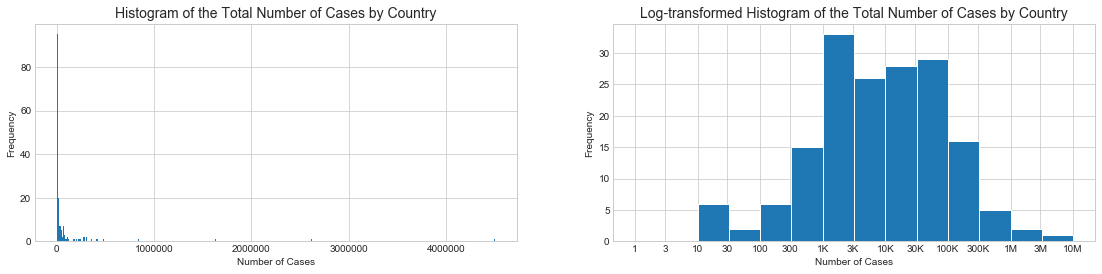

In [83]:
# Histogram and log-transformed histogram of cases
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(19,4))

bins = np.arange(0, df_by_ctry['cases'].max()+10000,10000)
ax1.hist(data = df_by_ctry, x = 'cases', bins=bins)
ax1.set_title('Histogram of the Total Number of Cases by Country', size =14)
ax1.set_xlabel('Number of Cases')
ax1.set_ylabel('Frequency');


bins = 10 ** np.arange(0, np.log10(df_by_ctry['cases'].max())+.5, .5)
ax2.hist(data=df_by_ctry, x = 'cases', bins = bins, edgecolor='w')
ax2.set_xscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000] 
labels = ['1', '3', '10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K', '300K', '1M','3M', '10M']
ax2.set_xticks(ticks) # to set xticks we defined
ax2.set_xticklabels(labels); # to show tick labels you desire
ax2.set_title('Log-transformed Histogram of the Total Number of Cases by Country', size=14)
ax2.set_xlabel('Number of Cases')
ax2.set_ylabel('Frequency');



In [106]:
# find which country represents the extreme outliers, i.e., above 1M cases
df_by_ctry.query('cases>1000000')[['country', 'cases']].sort_values('cases', ascending=False)

,country,cases
4,United States of America,"4,495,014.00"
29,Brazil,"2,610,102.00"
98,India,"1,638,870.00"


#### `deaths` variable

In [27]:
# find the min and max values of deaths to choose the bin width and to evaluate variability
df_by_ctry['deaths'].min(), df_by_ctry['deaths'].max()

(0.0, 152070.0)

In deaths variable, there is also a large variability, so I am going to plot both the normal histogram and log-transformed histogram

In [28]:
# find the min and max values to choose the bin width for log scale histogram of the deaths
np.log10(df_by_ctry['deaths'].min()+1), np.log10(df_by_ctry['deaths'].max()) # added 1 to min() since log 0 is not valid

(0.0, 5.182043545943064)

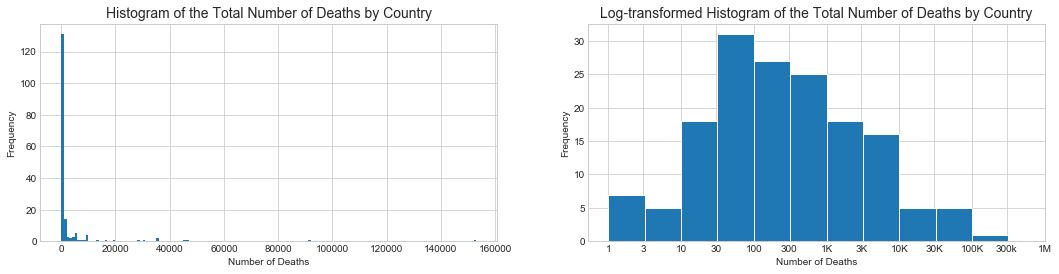

In [109]:
# Histogram and log-transformed histogram of deaths
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))

bins = np.arange(0, df_by_ctry['deaths'].max()+1000,1000)
ax1.hist(data = df_by_ctry, x = 'deaths', bins=bins)
ax1.set_title('Histogram of the Total Number of Deaths by Country', size=14)
ax1.set_xlabel('Number of Deaths')
ax1.set_ylabel('Frequency');

bins = 10 ** np.arange(0, np.log10(df_by_ctry['deaths'].max())+.5, .5)
ax2.hist(data=df_by_ctry, x = 'deaths', bins = bins, edgecolor='w')
ax2.set_xscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000] # extend scale to 1M for future deaths
labels = ['1', '3', '10', '30', '100', '300', '1K', '3K', '10K', '30K', '100K', '300k', '1M']
ax2.set_xticks(ticks) # to set xticks you defined
ax2.set_xticklabels(labels); # to show tick labels you desire
ax2.set_title('Log-transformed Histogram of the Total Number of Deaths by Country', size=14)
ax2.set_xlabel('Number of Deaths')
ax2.set_ylabel('Frequency');

#### `case_ratio` variable

In [30]:
# find the min and max values of case_ratio to choose the bin width and to evaluate variability
df_by_ctry['case_ratio'].min(), df_by_ctry['case_ratio'].max()

(0.0, 390.0)

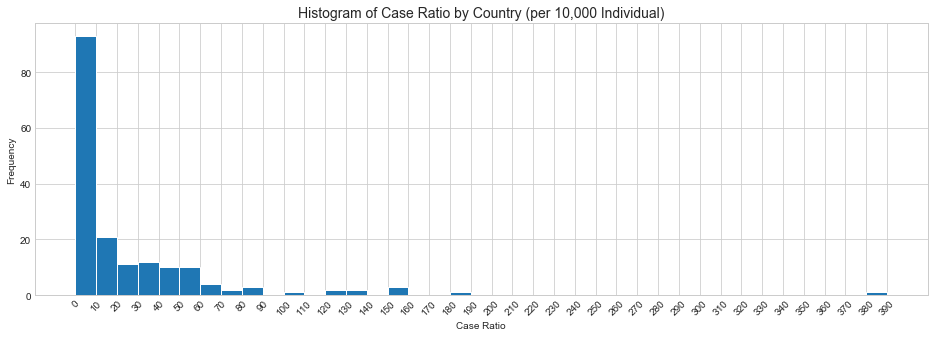

In [110]:
# histogram for case_ratio
plt.figure(figsize=(16,5))
bins = np.arange(0, df_by_ctry['case_ratio'].max()+10, 10)
plt.hist(data=df_by_ctry, x='case_ratio', bins=bins, edgecolor='w')
plt.xticks(np.arange(0,df_by_ctry['case_ratio'].max()+10, 10))
plt.title('Histogram of Case Ratio by Country (per 10,000 Individual)', size=14)
plt.xlabel('Case Ratio')
plt.ylabel('Frequency')
plt.xticks(rotation=45);

Let's find which countries have case ratio of 100 per 10,000 and above 

In [32]:
# find which countries have case_ratio of 100 per 10000 and above
df_by_ctry.query('case_ratio > 100')[['country', 'case_ratio']].sort_values('case_ratio', ascending=False)

,country,case_ratio
85,Qatar,390.00
10,Chile,187.00
88,Oman,159.00
86,Kuwait,158.00
33,Panama,151.00
4,United States of America,137.00
109,Armenia,130.00
31,Peru,125.00
29,Brazil,124.00
128,Luxembourg,108.00


#### `death_ratio` variable

In [33]:
# find the minimum and maximum death ratio to choose bin width for histogram and to evaluate variability
df_by_ctry['death_ratio'].min(), df_by_ctry['death_ratio'].max()

(0.0, 28.0)

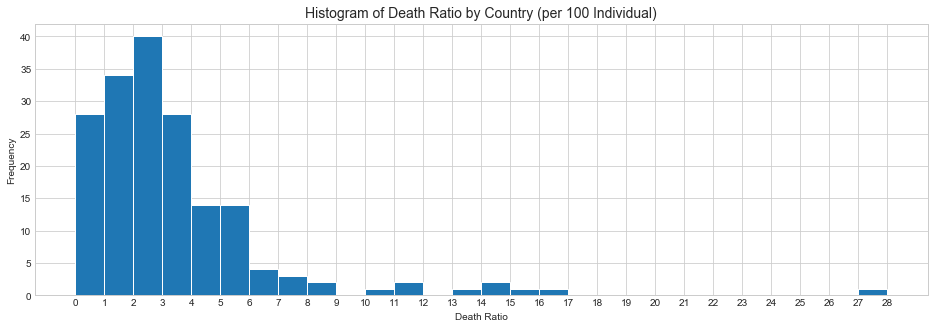

In [111]:
# histogram for death ratio per 100 individuals
plt.figure(figsize=(16,5))
bins=np.arange(0,df_by_ctry['death_ratio'].max()+1, 1)
plt.hist(data=df_by_ctry, x='death_ratio', bins=bins, edgecolor='w')
plt.xticks(bins)
plt.title('Histogram of Death Ratio by Country (per 100 Individual)', size=14)
plt.xlabel('Death Ratio')
plt.ylabel('Frequency');

In [35]:
#find the countries with death_ratio > 10 per 100 individual
df_by_ctry.query('death_ratio > 10').sort_values('death_ratio', ascending=False) \
[['country', 'death_ratio']].sort_values('death_ratio', ascending=False)

,country,death_ratio
157,Yemen,28.00
43,France,16.00
143,United Kingdom,15.00
129,Belgium,14.00
141,Italy,14.00
115,Hungary,13.00
27,Mexico,11.00
130,Netherlands,11.00


#### `density` variable

As I said earlier, we have countries with density equal to zero due to the fact that I filled missing values with zeros. To prevent that from affecting the histogram I will create a new DataFrame excluding entries with density = 0

In [36]:
# create a list of countries with density = 0
zero_density = df_by_ctry[df_by_ctry['density']==0]['country'].to_list()
zero_density

['Falkland Is.',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Vanuatu',
 'North Korea',
 'Turkmenistan',
 'Solomon Is.',
 'N. Cyprus',
 'Somaliland']

In [37]:
# create dataframe excluding entries where density = 0
density_no_0 = df_by_ctry[~df_by_ctry['country'].isin(zero_density)]

# check the resulting df
density_no_0.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 167 entries, 0 to 175
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   continent    167 non-null    object  
 1   country      167 non-null    object  
 2   iso_3        167 non-null    object  
 3   geometry     167 non-null    geometry
 4   cases        167 non-null    float64 
 5   deaths       167 non-null    float64 
 6   population   167 non-null    float64 
 7   density      167 non-null    float64 
 8   case_ratio   167 non-null    float64 
 9   death_ratio  167 non-null    float64 
dtypes: float64(6), geometry(1), object(3)
memory usage: 14.4+ KB


In [38]:
# find min and max value of density to choose bin width and to evaulate variability
density_no_0['density'].min(), density_no_0['density'].max()

(2.0, 1265.0)

In [39]:
# choose min and mix values of density to choose bin width for the log-scale histogram
np.log10(density_no_0['density'].min()+1), np.log10(density_no_0['density'].max()) # added 1 to min() since log is 0 is not valid

(0.47712125471966244, 3.1020905255118367)

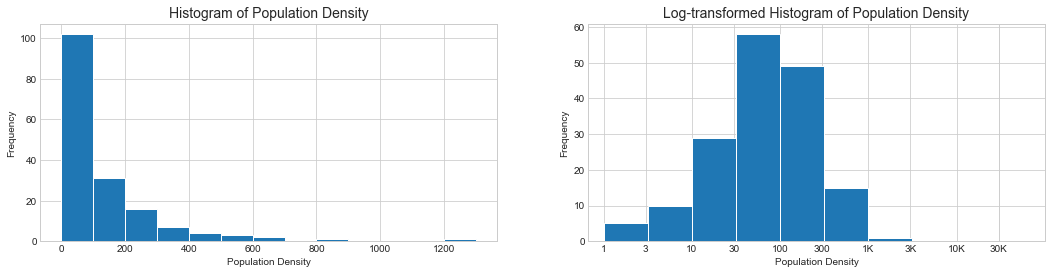

In [112]:
# Histogram and log-transformed histogram of density
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))

bins = np.arange(0, density_no_0['density'].max()+100,100)
ax1.hist(data = density_no_0, x = 'density', bins=bins, edgecolor='w')
ax1.set_title('Histogram of Population Density', size=14)
ax1.set_xlabel('Population Density')
ax1.set_ylabel('Frequency');

bins = 10 ** np.arange(0, np.log10(density_no_0['density'].max())+.5, .5)
ax2.hist(data=density_no_0, x = 'density', bins = bins, edgecolor='w')
ax2.set_xscale('log')
ticks=[1,3,10,30,100,300,1000,3000,10000,30000,100000, 30000]
labels=['1', '3', '10', '30', '100', '300','1K', '3K', '10K', '30K']
ax2.set_xticks(ticks) # to set xticks you defined
ax2.set_xticklabels(labels); # to show tick labels you desire
ax2.set_title('Log-transformed Histogram of Population Density', size=14)
ax2.set_xlabel('Population Density')
ax2.set_ylabel('Frequency');

### Bivariate Analysis on `df_by_ctry`

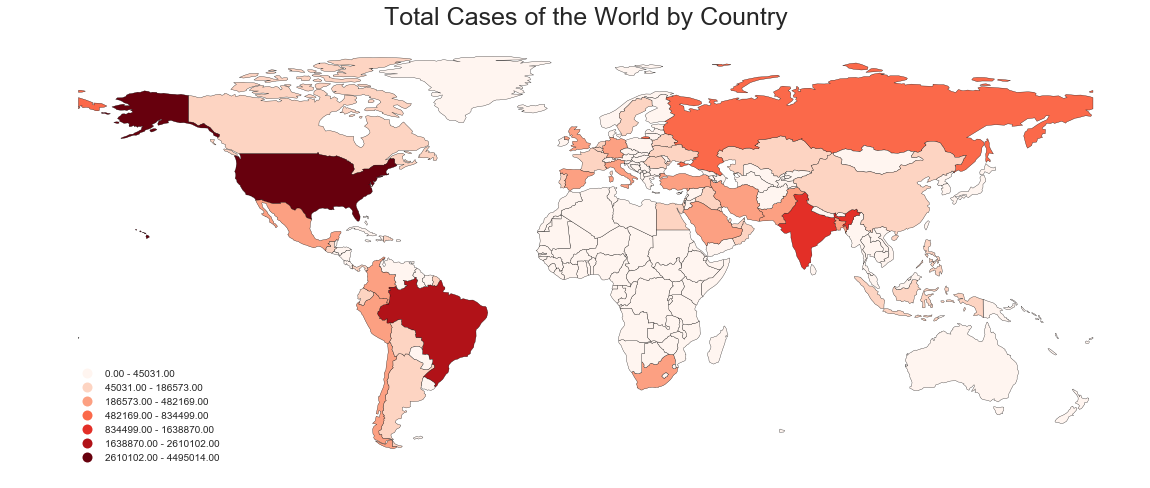

In [113]:
# world map for cases by country
ax = df_by_ctry.plot(column = 'cases', 
                cmap='Reds',  
                edgecolor='k', 
                linewidth = .3, 
                figsize=(20,20),
                legend=True,
                scheme='FisherJenks', k=7
                )
ax.set_title('Total Cases of the World by Country', fontdict={'fontsize': 25, 'fontweight': 5}, pad=12)
ax.get_legend().set_bbox_to_anchor((.18, .25))
ax.axis('off');


For plotting the bar charts, I am going to use `df_total` instead, because it has all the countries. As reminder, `df_by_ctry` had only countries that were in `df_map` which is fine to use for plotting maps since the map won't show small entities/islands anyways. 

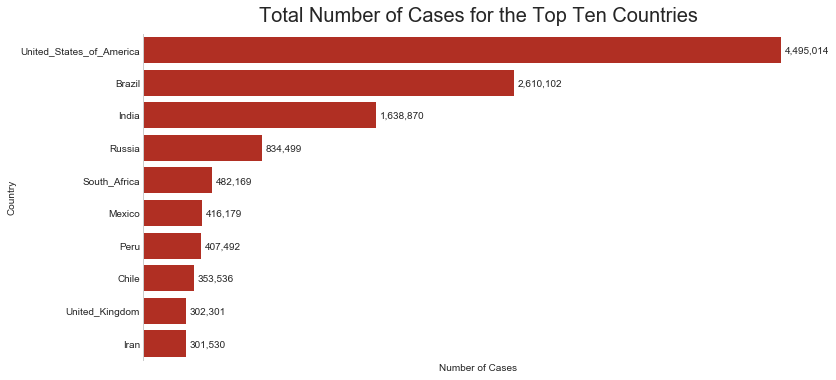

In [42]:
# bar chart of cases for the top 10 countries
top_10 = df_total.sort_values('cases', ascending=False).head(10) # create df of 10 countries with largest number of cases

fig, ax = plt.subplots(1, figsize=(12,6))

ax = sns.barplot(data=top_10, y='country', x='cases', color='#C81C0B')

for i, j in zip(ax.patches, top_10['cases']): # loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+25000, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

    ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Total Number of Cases for the Top Ten Countries', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Cases')
ax.set_ylabel('Country');

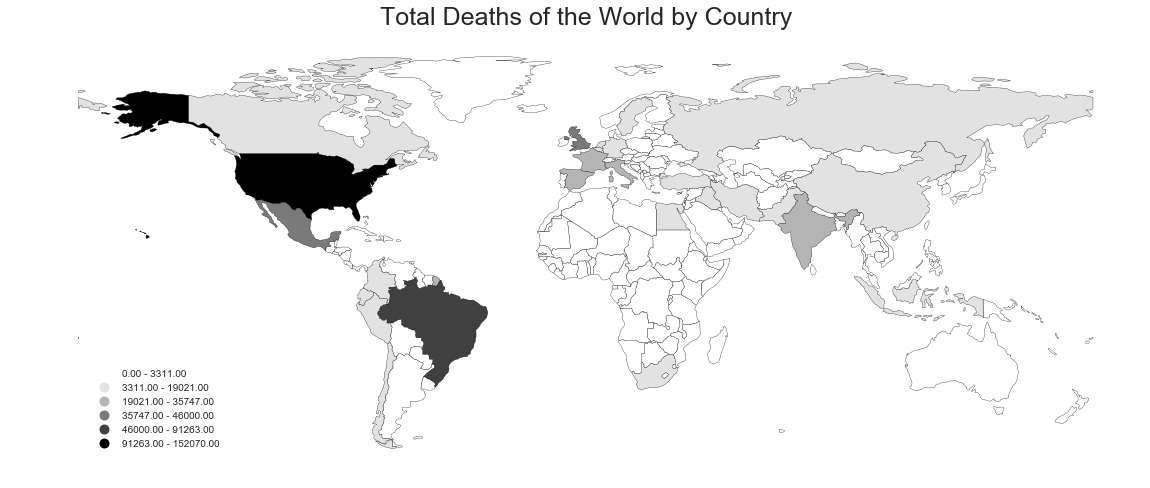

In [114]:
# world map for deaths by country
ax = df_by_ctry.plot(column = 'deaths', 
                cmap='Greys',  
                edgecolor='k', 
                linewidth = .3, 
                figsize=(20,20),
                legend=True,
                scheme='FisherJenks', k=6
                )
ax.set_title('Total Deaths of the World by Country', fontdict={'fontsize': 25, 'fontweight': 5}, pad=12)
ax.get_legend().set_bbox_to_anchor((.18, .25))
ax.axis('off');

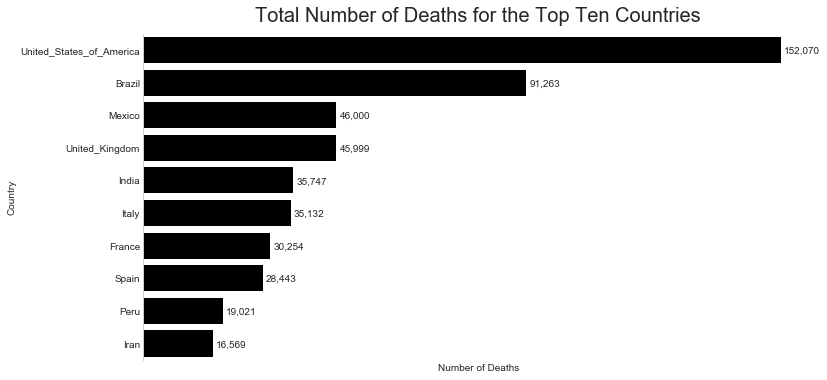

In [44]:
# bar chart of deaths for the top 10 countries
top_10 = df_total.sort_values('deaths', ascending=False).head(10) # create df of 10 countries with largest number of cases

fig, ax = plt.subplots(1, figsize=(12,6))

ax = sns.barplot(data=top_10, y='country', x='deaths', color='k')

for i, j in zip(ax.patches, top_10['deaths']): # loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+750, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

    ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Total Number of Deaths for the Top Ten Countries', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Deaths')
ax.set_ylabel('Country');

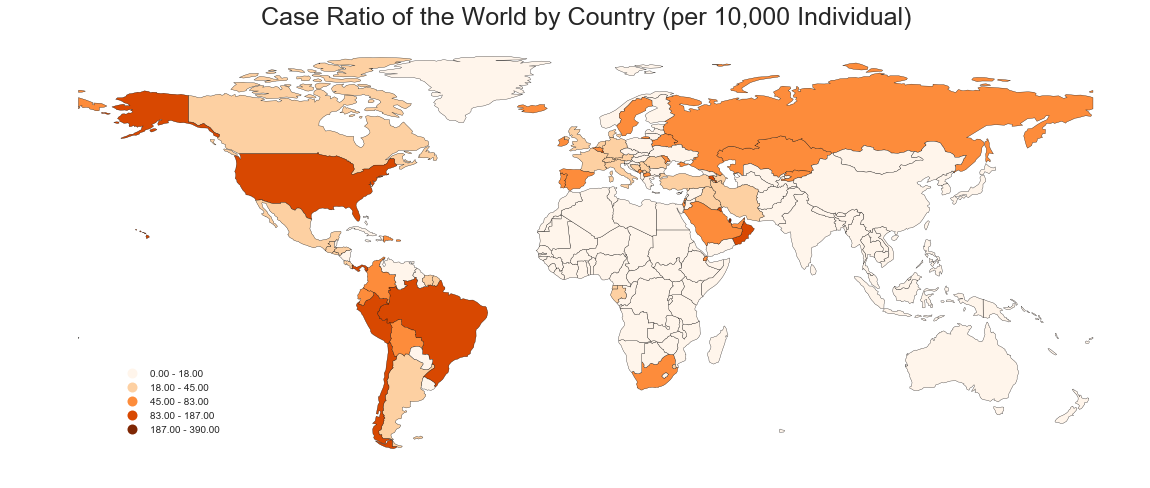

In [115]:
# world map for case_ratio by country
ax = df_by_ctry.plot(column = 'case_ratio', 
                cmap='Oranges',  
                edgecolor='k', 
                linewidth = .3, 
                figsize=(20,20),
                legend=True,
                scheme='FisherJenks'
                )
ax.set_title('Case Ratio of the World by Country (per 10,000 Individual)', fontdict={'fontsize': 25, 'fontweight': 5}, pad=12)
ax.get_legend().set_bbox_to_anchor((.18, .25))
ax.axis('off');


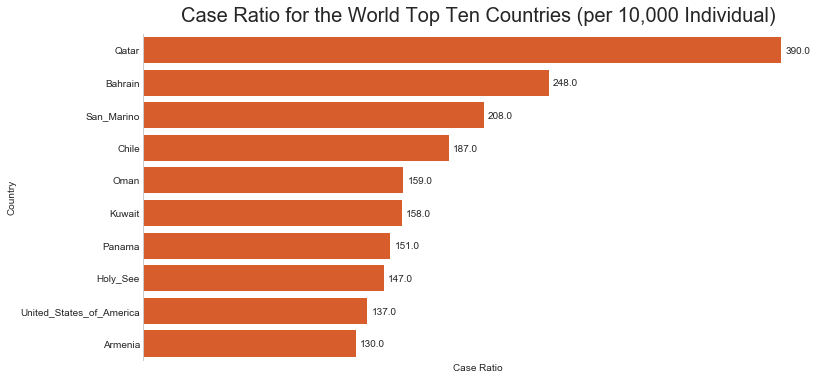

In [84]:
# bar chart of case ratio for the top 10 countries
top_10 = df_total.sort_values('case_ratio', ascending=False).head(10) # create df of 10 countries with largest number of cases

fig, ax = plt.subplots(1, figsize=(12,6))

ax = sns.barplot(data=top_10, y='country', x='case_ratio', color='#F35110')

for i, j in zip(ax.patches, top_10['case_ratio']): # loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+2.5, i.get_y()+.50,round(j,3))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Case Ratio for the World Top Ten Countries (per 10,000 Individual)', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Case Ratio')
ax.set_ylabel('Country');

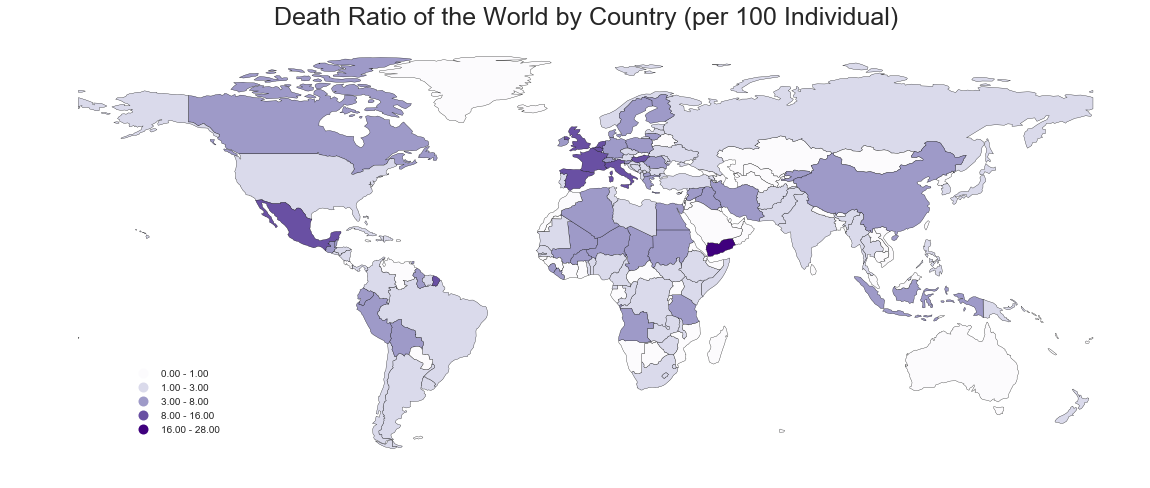

In [116]:
# world map for death_ratio by country
ax = df_by_ctry.plot(column = 'death_ratio', 
                cmap='Purples',  
                edgecolor='k', 
                linewidth = .3, 
                figsize=(20,20),
                legend=True,
                scheme='FisherJenks'
                )
ax.set_title('Death Ratio of the World by Country (per 100 Individual)', fontdict={'fontsize': 25, 'fontweight': 5}, pad=12)
ax.get_legend().set_bbox_to_anchor((.18, .25))
ax.axis('off');

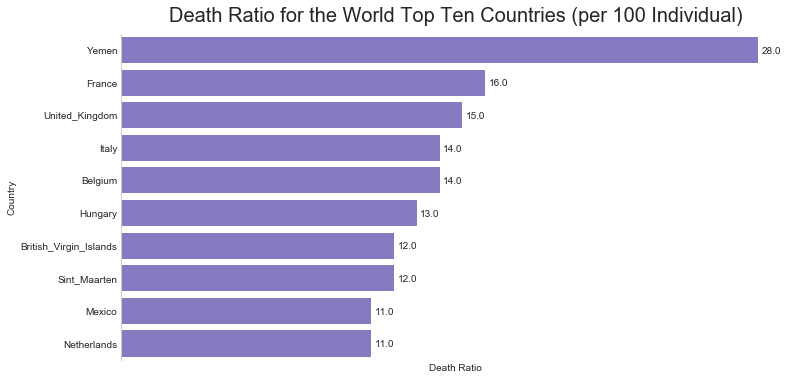

In [85]:
top_10 = df_total.sort_values('death_ratio', ascending=False).head(10) # create df of 10 countries with largest number of cases

fig, ax = plt.subplots(1, figsize=(12,6))

ax = sns.barplot(data=top_10, y='country', x='death_ratio', color='#7E6ECD')

for i, j in zip(ax.patches, top_10['death_ratio']): # loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+.15, i.get_y()+.50, round(j,2))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Death Ratio for the World Top Ten Countries (per 100 Individual)', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Death Ratio')
ax.set_ylabel('Country');

### TimeSeries Analysis

Now, I would like to see the the total number of cases and deaths for the whole countries by day. To do that I will create `df_by_day` by grouping `df` by `date`. Also, to avoid distortion in the plots, I will create two new columns: `case_rolling_mean` and `death_rolling_mean` to take the rolling mean of cases and deaths Respectively, for seven days.


In [49]:
# create df_by_day
df_by_day = df.groupby('date').sum()[['cases', 'deaths']]

# add case_rolling_mean and death_rolling_mean
df_by_day.loc[:,'case_rolling_mean'] = df_by_day['cases'].rolling(window=7).mean()
df_by_day.loc[:,'death_rolling_mean'] = df_by_day['deaths'].rolling(window=7).mean()

In [50]:
# check the first 10 rows
df_by_day.head(10)

,cases,deaths,case_rolling_mean,death_rolling_mean
date,,,,
2019-12-31,27,0,nan,nan
2020-01-01,0,0,nan,nan
2020-01-02,0,0,nan,nan
2020-01-03,17,0,nan,nan
2020-01-04,0,0,nan,nan
2020-01-05,15,0,nan,nan
2020-01-06,0,0,8.43,0.00
2020-01-07,0,0,4.57,0.00
2020-01-08,0,0,4.57,0.00


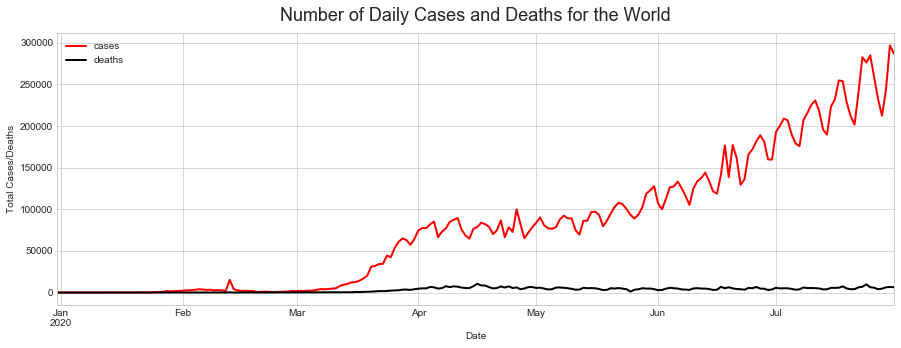

In [117]:
# plot line chart for both daily cases and daily deaths for the world
plt.figure(figsize=(15,5))
df_by_day['cases'].plot(color='r', linewidth=2)
df_by_day['deaths'].plot(color='k', linewidth=2)
plt.title('Number of Daily Cases and Deaths for the World', fontdict = {'fontsize': 18}, pad=12)
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.legend();

From the plot above, we can see the number of daily cases and deaths is alternating between high and low. Let me zoon on cases for the last month, i.e., from July 1 to July 31 to have a better look.

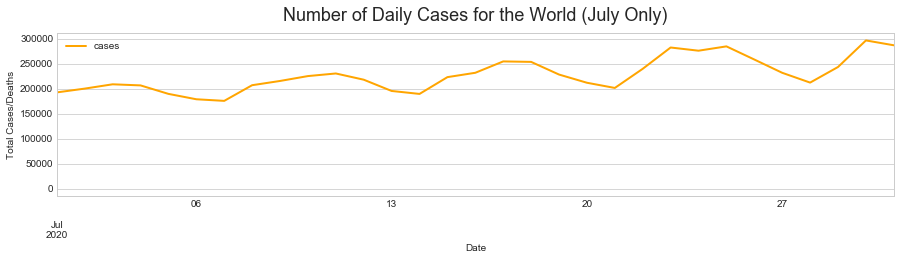

In [118]:
plt.figure(figsize=(15,3))
df_by_day['cases'].plot(color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.legend()
plt.xlim('7/1/2020', '7/31/2020')
plt.title('Number of Daily Cases for the World (July Only)', fontdict = {'fontsize': 18}, pad=12);

As we can see the number of daily cases for the world in the last month peaked up around the middle of the week. I am not sure why though!

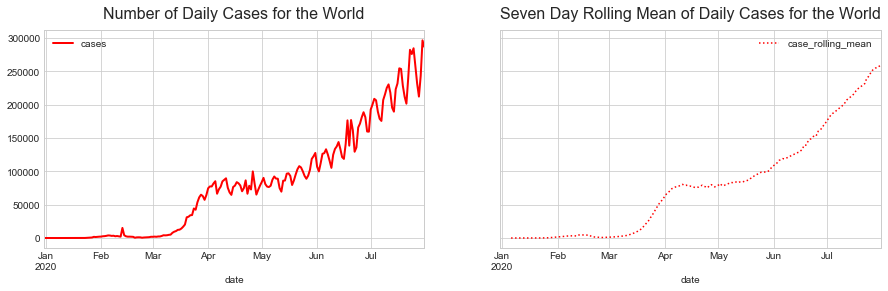

In [119]:
# create two line charts one for the daily cases and the 2nd for daily cases(moving_avg)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4), sharey=True)

# 1st plot - cases
df_by_day['cases'].plot(ax=ax1, color='r', linewidth=2)
ax1.set_title('Number of Daily Cases for the World', fontdict = {'fontsize': 16}, pad=12)
ax1.legend()

# 2nd plot - rolling mean of cases
df_by_day['case_rolling_mean'].plot(ax=ax2, color='r', linestyle=':')
ax2.set_title('Seven Day Rolling Mean of Daily Cases for the World', fontdict = {'fontsize': 16}, pad=12)
ax2.legend();

By looking at the seven-day rolling mean of the world total daily cases, we notice two waves of increase. The first one started in the mid of March until the end of the first week of April, i.e., three weeks of cases around 8000 per day and it stayed like that until the mid of May, i.e., kept the same rate for five weeks. The second wave started by the mid of May and kept increasing up to 250,000 cases per day by July 31.

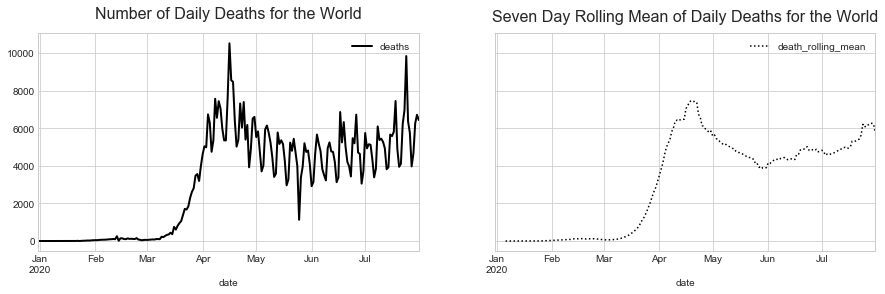

In [120]:
# create two line charts one for the daily deaths and the 2nd for daily deaths(moving_avg)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4), sharey=True)

# 1st plot - deaths
df_by_day['deaths'].plot(ax=ax1, color='k', linewidth=2)
ax1.set_title('Number of Daily Deaths for the World', fontdict = {'fontsize': 16}, pad=15)
ax1.legend()

# 2nd plot - rolling of deaths
df_by_day['death_rolling_mean'].plot(ax=ax2, color='k', linestyle=':')
ax2.set_title('Seven Day Rolling Mean of Daily Deaths for the World', fontdict = {'fontsize': 16}, pad=12)
ax2.legend();

For the world total daily deaths, we see the number of daily deaths has a sharp increase from the mid of March until the mid of April with total deaths around 7500/day. However, the number decreased afterward until June where it started to increase again to reach about 6000 deaths by the end of July. However, we can still assume that the number of deaths is reducing comparing to the increase of the number cases. 

### Part 2 - Find the Relationship between the Number of Total Cases and Population Density
In this part,I would like to answer a question whether a relationship exists between the population density and number of total cases. My initial assumption is that as the population density increases, the total number of cases increases due to higher infection possibility.

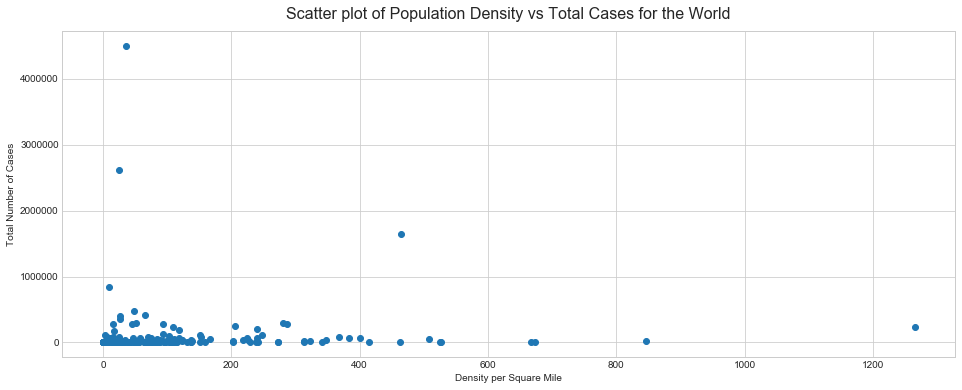

In [121]:
# scatter plot for cases vs density
plt.figure(figsize=(16,6))
plt.scatter(data=df_by_ctry, x='density', y='cases')
plt.ylabel('Total Number of Cases')
plt.xlabel("Density per Square Mile")
plt.title('Scatter plot of Population Density vs Total Cases for the World', fontdict={'fontsize':'16'}, pad=12);

From the scatter plot above, we do not seem to have a relationship between population density and the total number of cases. On the contrary, we see two extreme points, the first one with low density but very high number of cases, while, the second point with has very high density but low number of cases. However, there could be many factors that hid the effect of high populated countries on the number of cases, such as curfew, precautions made by people, and so on.

### Part 3 - Explore the Arab world
Now, I am intersted to see the number of cases and deaths for Arab Wrold countries, so I will create new DataFrame `df_arab_by_ctry`

In [56]:
# create a list of the iso code for all arab countries
arab_iso =['DZA', 'BHR', 'COM', 'DJI', 'EGY', 'IRQ', 'JOR', 'KWT', 'LBN', 'LBY', 'MRT', 'MAR', 'OMN', 
           'PSE', 'QAT', 'SAU', 'SOM', 'SDN', 'SYR', 'TUN',  'ARE', 'YEM', 'SSD']
           

# check if all Arab countries are available in df by checking if number of ctrys is 23
len(df_total[df_total['iso_3'].isin(arab_iso)]['iso_3'])

23

In [57]:
# create df_arab_by_ctry
df_arab_by_ctry = df_total[df_total['iso_3'].isin(arab_iso)]

# check the resulting df
df_arab_by_ctry

,country,iso_3,cases,deaths,population,density,case_ratio,death_ratio
2,Algeria,DZA,29831,1200,43053054,18.00,7.00,4.00
14,Bahrain,BHR,40755,146,1641164,"2,239.00",248.00,0.00
43,Comoros,COM,378,7,850891,467.00,4.00,2.00
54,Djibouti,DJI,5081,58,973557,43.00,52.00,1.00
58,Egypt,EGY,93757,4774,100388076,103.00,9.00,5.00
94,Iraq,IRQ,121263,4671,39309789,93.00,31.00,4.00
102,Jordan,JOR,1191,11,10101697,115.00,1.00,1.00
106,Kuwait,KWT,66529,445,4207077,240.00,158.00,1.00
110,Lebanon,LBN,4334,57,6855709,667.00,6.00,1.00
113,Libya,LBY,3222,71,6777453,4.00,5.00,2.00


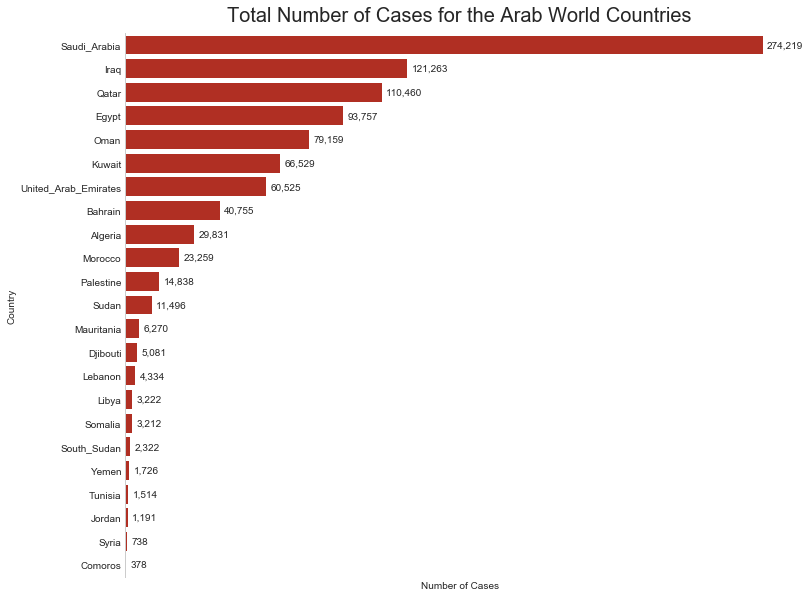

In [95]:
# bar chart of total cases for Arab World countries
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.barplot(data= df_arab_by_ctry.sort_values('cases', ascending=False), y='country', x='cases', color='#C81C0B')

for i, j in zip(ax.patches, df_arab_by_ctry.sort_values('cases', ascending=False)['cases']): #loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+2000, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Total Number of Cases for the Arab World Countries', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Cases')
ax.set_ylabel('Country');

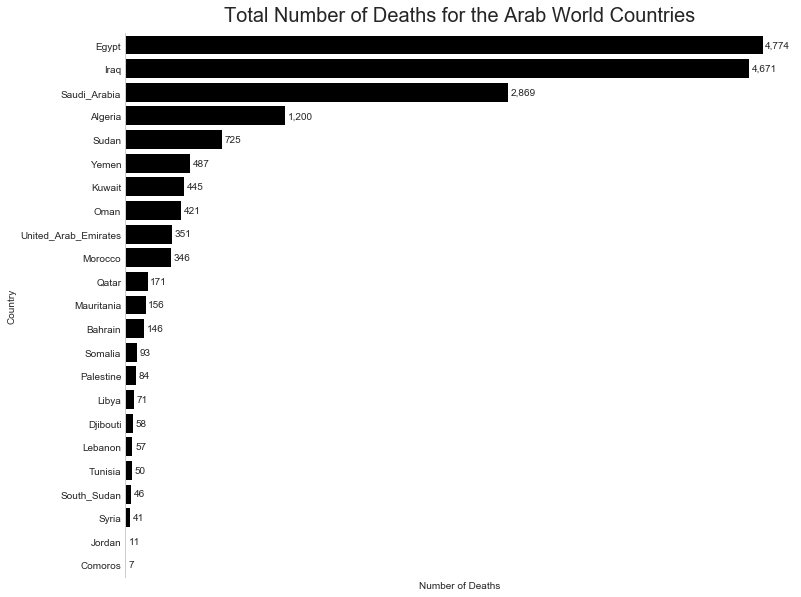

In [59]:
# bar chart of total deaths for Arab World countries
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.barplot(data= df_arab_by_ctry.sort_values('deaths', ascending=False), y='country', x='deaths', color='k')

for i, j in zip(ax.patches, df_arab_by_ctry.sort_values('deaths', ascending=False)['deaths']): #loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+20, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Total Number of Deaths for the Arab World Countries', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Deaths')
ax.set_ylabel('Country');

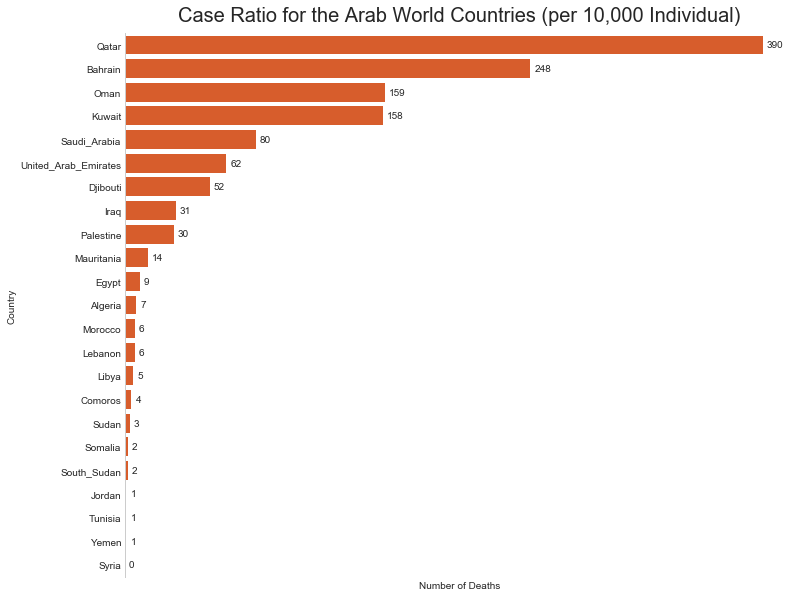

In [97]:
# bar chart of case ratio for Arab World countries
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.barplot(data= df_arab_by_ctry.sort_values('case_ratio', ascending=False), y='country', x='case_ratio', color='#F35110')

for i, j in zip(ax.patches, df_arab_by_ctry.sort_values('case_ratio', ascending=False)['case_ratio']): #loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+2.5, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Case Ratio for the Arab World Countries (per 10,000 Individual)', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Deaths')
ax.set_ylabel('Country');

Interestingly enough, we see the Arab Gulf countries have the highest case ratio starting with Qatar and ending with UAE. 

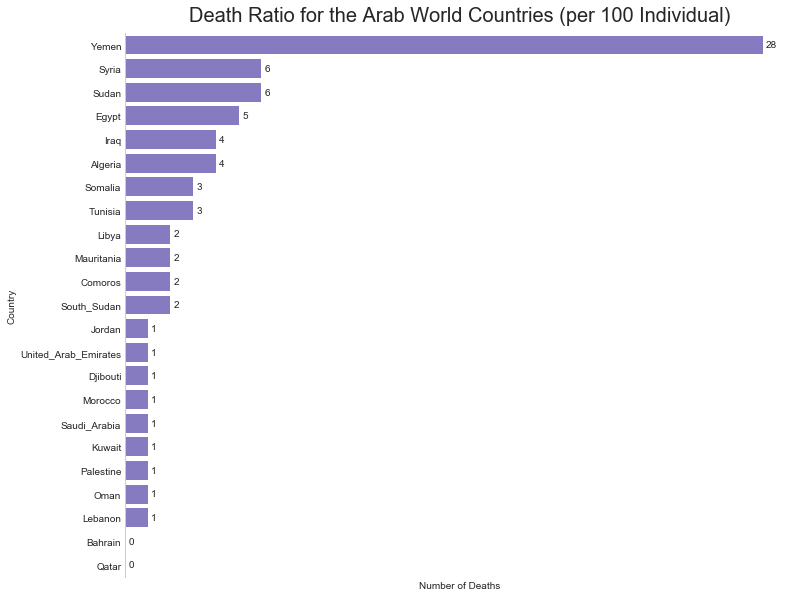

In [100]:
# bar chart of case ratio for Arab World countries
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.barplot(data= df_arab_by_ctry.sort_values('death_ratio', ascending=False), y='country', x='death_ratio', color='#7E6ECD')

for i, j in zip(ax.patches, df_arab_by_ctry.sort_values('death_ratio', ascending=False)['death_ratio']): #loop for every bar and every case value in top_10 df
    ax.text(i.get_width()+.15, i.get_y()+.50, '{:,}'.format(math.trunc(j)))

ax.axes.get_xaxis().set_ticks([]) # remove xaxis ticks
ax.spines['right'].set_visible(False) # remove the right spine to prevent annotation overlapping
ax.spines['bottom'].set_visible(False) # remove for better look
ax.spines['top'].set_visible(False) # remove for for better look
ax.set_title('Death Ratio for the Arab World Countries (per 100 Individual)', fontdict = {'fontsize': 20}, pad=12)
ax.set_xlabel('Number of Deaths')
ax.set_ylabel('Country');

From the bar chart above we see Yemen is by far has the highest death ratio, not only in the Arab world countries, but also in the entire world. However, Qatar and Bahrain has almost zero death ratio. What interesting is that Qatar has the highest case ratio in the world but they have the lowest death ratio among the Arab world countries. I am not sure how they managed to do that; probably this will need a separate analysis.

Now, I would like to see the number of cases overtime for each Arab World country. To that, I will create a new DataFrame `df_arab_by_day` from `df`

In [60]:
df_arab_by_day = df[df['iso_3'].isin(arab_iso)]

# check the first five rows
df_arab_by_day.head()

,date,cases,deaths,country,iso_2,iso_3,population,continent,density
349,2020-07-31,602,14,Algeria,DZ,DZA,43053054,Africa,18.00
350,2020-07-30,614,12,Algeria,DZ,DZA,43053054,Africa,18.00
351,2020-07-29,642,11,Algeria,DZ,DZA,43053054,Africa,18.00
352,2020-07-28,616,8,Algeria,DZ,DZA,43053054,Africa,18.00
353,2020-07-27,593,9,Algeria,DZ,DZA,43053054,Africa,18.00


## Facetgrid Practice

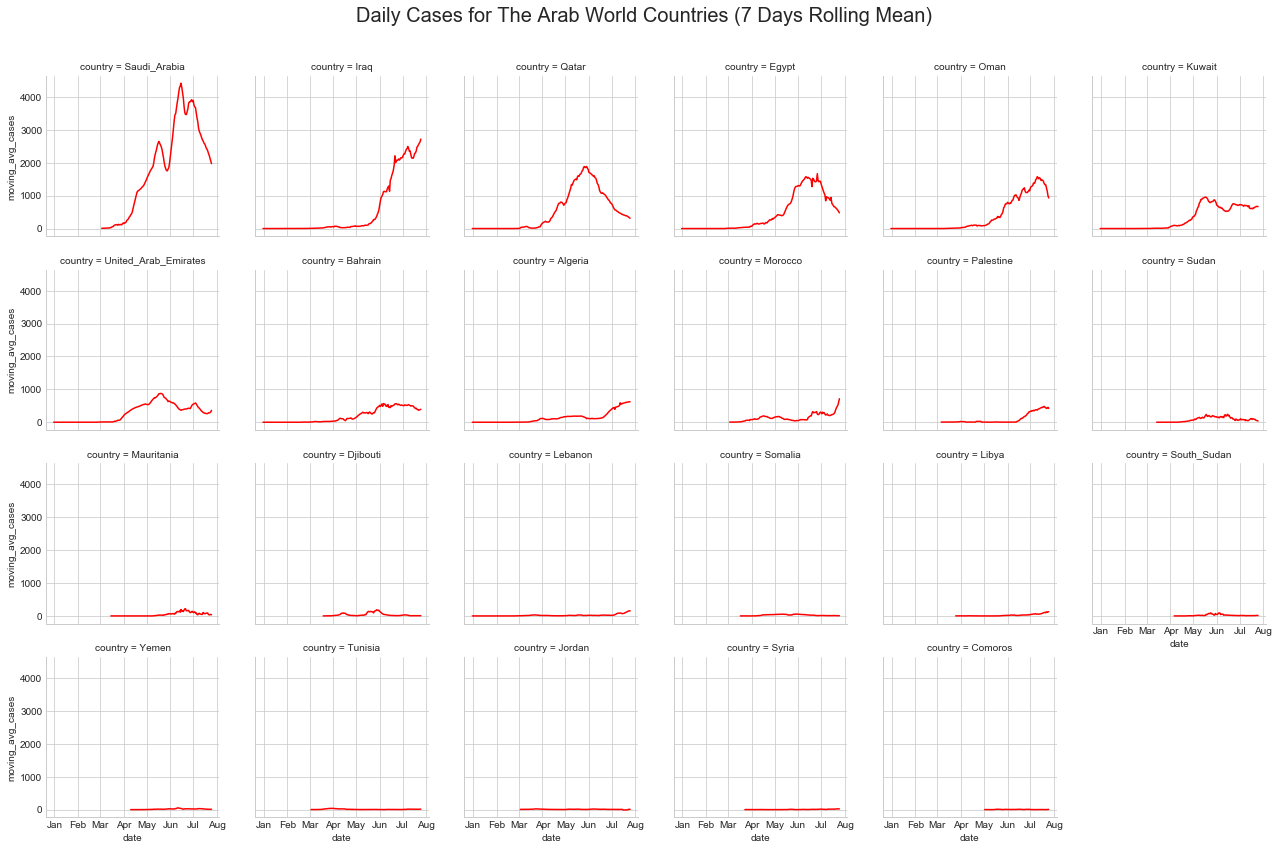

In [122]:
# assign a new column for cases rolling mean for 7 days for each country
df_arab_by_day = df_arab_by_day.assign(moving_avg_cases = df.groupby('country')['cases'].rolling(window=7).mean().reset_index(0, drop=True))

# create FacetGrid for daily cases moving average
order = df_arab_by_day.groupby('country').sum().sort_values('moving_avg_cases', ascending=False).index

g = sns.FacetGrid(df_arab_by_day, col='country', col_wrap=6, col_order=order)
g = g.map(plt.plot, 'date', 'moving_avg_cases', color='r')

locator = mdates.MonthLocator()
formatter = mdates.DateFormatter('%b')

g.axes[0].xaxis.set_major_locator(locator)
g.axes[0].xaxis.set_major_formatter(formatter)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Daily Cases for The Arab World Countries (7 Days Rolling Mean)', size=20);

From the FacetGrid above we see most of the Arab world countries are getting better in reducing the number of daily cases except Iraq, Algeria, Morocco, and Palestine with Iraq being the worst. Lebanon and Libya have slight increase in the mid of July

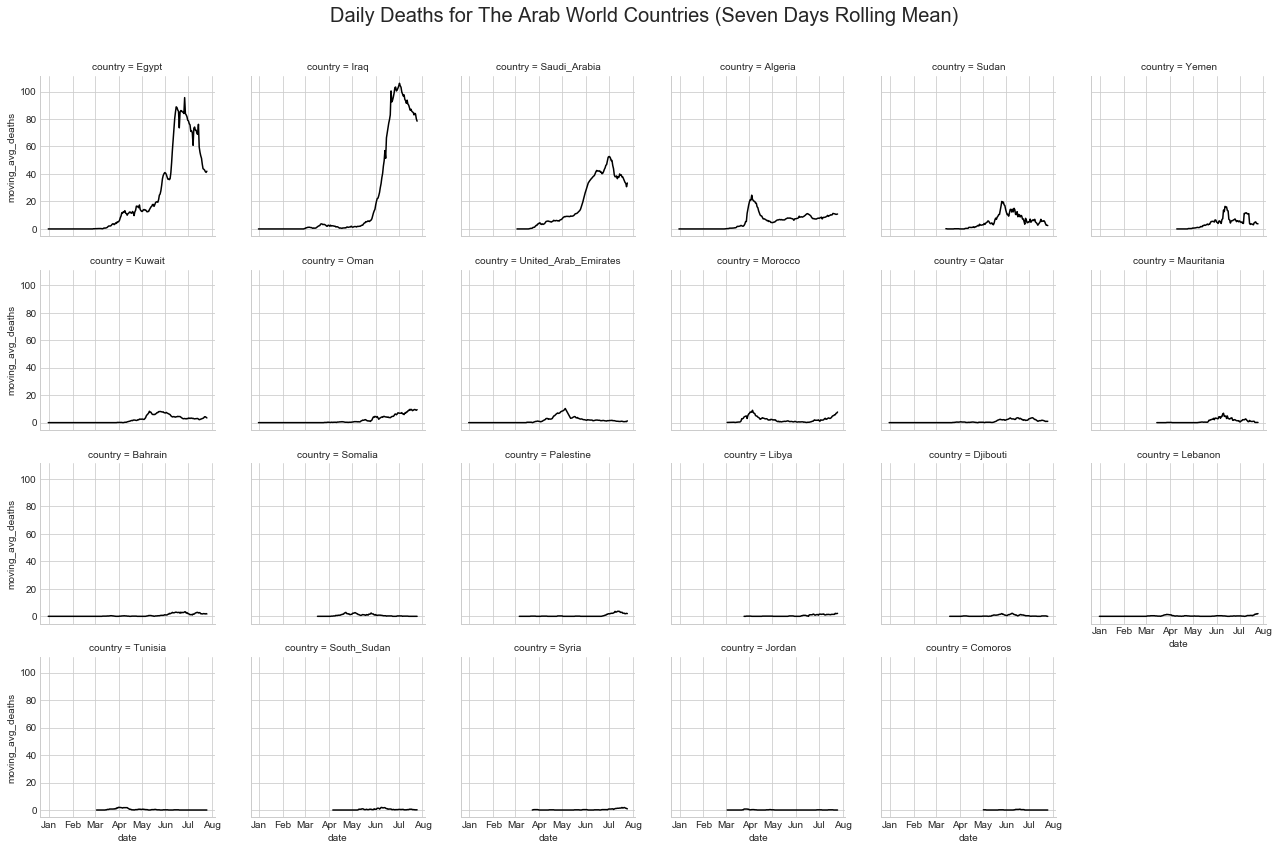

In [123]:
# assign a new column for deaths rolling mean for 7 days for each country
df_arab_by_day = df_arab_by_day.assign(moving_avg_deaths = df.groupby('country')['deaths'].rolling(window=7).mean().reset_index(0, drop=True))

# create FacetGrid for daily deaths moving average
order = df_arab_by_day.groupby('country').sum().sort_values('moving_avg_deaths', ascending=False).index

g = sns.FacetGrid(df_arab_by_day, col='country', col_wrap=6, col_order=order)
g = g.map(plt.plot, 'date', 'moving_avg_deaths', color='k')

locator = mdates.MonthLocator()
formatter = mdates.DateFormatter('%b')

g.axes[0].xaxis.set_major_locator(locator)
g.axes[0].xaxis.set_major_formatter(formatter)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Daily Deaths for The Arab World Countries (Seven Days Rolling Mean)', size=20);

For daily deaths, we some most of the countries have reduced number of daily death after high peaks. However, Algeria and Morocco seem to develop new peaks but it is not clear as the data ends by July

Now, I would like to plot a line graphs for daily cases for the top five arab countries to compare among them

In [67]:
# Create index for the top five countries with the highest cases
arab_top_5 = df_arab_by_day.groupby('country').sum().sort_values('cases', ascending=False).head().index

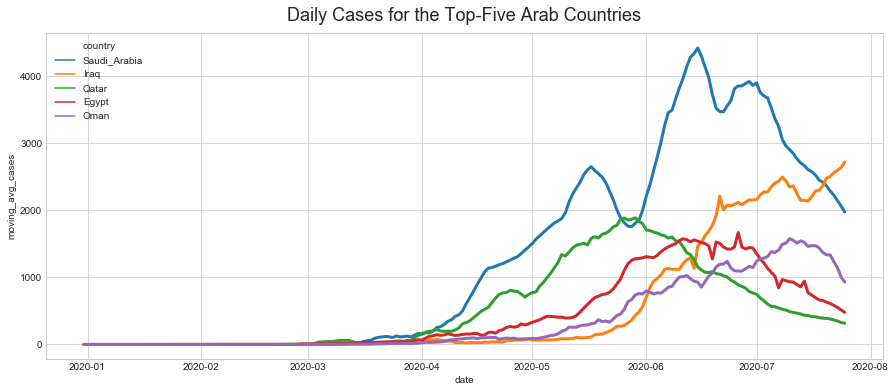

In [89]:
# line graph for the top five Arab countries
plt.figure(figsize=(15,6))
sns.lineplot(x='date', y='moving_avg_cases', hue='country', data=df_arab_by_day, hue_order=arab_top_5, linewidth=3)
plt.title('Daily Cases for the Top-Five Arab Countries', fontdict = {'fontsize':18}, pad=12)
plt.legend(loc=2);

From the graph above, we see all the countries seem to better managed the number of daily cases except Iraq, which is heading toward higher daily cases. However, Iraq showed low daily cases from the beginning of the pandemic until the third week of May where it started to develop new cases quickly.